# 100. Boston House Price Regression

- 보스턴 주택가격 예측

### 13 개의 종속변수와 1 개의 독립변수 (주택가격 중앙값) 으로 구성

#### 독립변수 (13 개)
CRIM 자치시(town) 별 1인당 범죄율  
ZN 25,000 평방피트를 초과하는 거주지역의 비율  
INDUS 비소매상업지역이 점유하고 있는 토지의 비율  
CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
NOX 10ppm 당 농축 일산화질소  
RM 주택 1가구당 평균 방의 개수  
AGE 1940년 이전에 건축된 소유주택의 비율  
DIS 5개의 보스턴 직업센터까지의 접근성 지수  
RAD 방사형 도로까지의 접근성 지수  
TAX 10,000 달러 당 재산세율  
PTRATIO 자치시(town)별 학생/교사 비율  
B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함  
LSTAT 모집단의 하위계층의 비율(%)   

#### 종속변수 (1 개)
MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)  

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df_boston = pd.read_csv("boston_house.csv", index_col=0)
boston = df_boston.drop('MEDV', axis=1)
target = df_boston.pop('MEDV')

In [3]:
X = boston.values
y = target.values

In [4]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [5]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [7]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

### model build

In [27]:
model = Sequential()

model.add(Input(shape=(13,)))  
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [28]:
model.compile(loss='mean_squared_error', optimizer='adam', 
              metrics=['mae', 'mse'])

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

- epoch 수와 batchz_size 변경하며 test

In [11]:
history = model.fit(X_train, y_train, batch_size=32, 
                    epochs=500, validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 556.1758 - mae: 21.7288 - mse: 556.1758 - val_loss: 574.1049 - val_mae: 21.9328 - val_mse: 574.1049
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 583.7102 - mae: 22.2407 - mse: 583.7102 - val_loss: 543.5198 - val_mae: 21.1892 - val_mse: 543.5198
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 506.0198 - mae: 20.5445 - mse: 506.0198 - val_loss: 502.8572 - val_mae: 20.1503 - val_mse: 502.8572
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 454.6780 - mae: 19.2694 - mse: 454.6780 - val_loss: 442.3352 - val_mae: 18.4979 - val_mse: 442.3352
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 434.4661 - mae: 18.4106 - mse: 434.4661 - val_loss: 360.7350 - val_mae: 16.0651 - val_mse: 360.7350
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 319.1158 - mae: 15.1320 - mse: 319.1158 - val_loss: 270.4345 - val_mae: 13.3376 - val_mse: 270.4345
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms

Epoch 243/500
12/12 [==============================] - 0s 3ms/step - loss: 11.7995 - mae: 2.2794 - mse: 11.7995 - val_loss: 9.7395 - val_mae: 2.4389 - val_mse: 9.7395
Epoch 244/500
12/12 [==============================] - 0s 3ms/step - loss: 11.5718 - mae: 2.3377 - mse: 11.5718 - val_loss: 9.3724 - val_mae: 2.3155 - val_mse: 9.3724
Epoch 245/500
12/12 [==============================] - 0s 3ms/step - loss: 11.5376 - mae: 2.2644 - mse: 11.5376 - val_loss: 9.5789 - val_mae: 2.4138 - val_mse: 9.5789
Epoch 246/500
12/12 [==============================] - 0s 4ms/step - loss: 11.5207 - mae: 2.2959 - mse: 11.5207 - val_loss: 9.3092 - val_mae: 2.3273 - val_mse: 9.3092
Epoch 247/500
12/12 [==============================] - 0s 3ms/step - loss: 11.4147 - mae: 2.2770 - mse: 11.4147 - val_loss: 9.3926 - val_mae: 2.3499 - val_mse: 9.3926
Epoch 248/500
12/12 [==============================] - 0s 3ms/step - loss: 11.7043 - mae: 2.2604 - mse: 11.7043 - val_loss: 9.5850 - val_mae: 2.4237 - val_mse: 9.585

12/12 [==============================] - 0s 3ms/step - loss: 10.3316 - mae: 2.2210 - mse: 10.3316 - val_loss: 9.0151 - val_mae: 2.3075 - val_mse: 9.0151
Epoch 293/500
12/12 [==============================] - 0s 4ms/step - loss: 10.0237 - mae: 2.1567 - mse: 10.0237 - val_loss: 8.7902 - val_mae: 2.2439 - val_mse: 8.7902
Epoch 294/500
12/12 [==============================] - 0s 3ms/step - loss: 9.9378 - mae: 2.1514 - mse: 9.9378 - val_loss: 8.8542 - val_mae: 2.2628 - val_mse: 8.8542
Epoch 295/500
12/12 [==============================] - 0s 3ms/step - loss: 10.0136 - mae: 2.1400 - mse: 10.0136 - val_loss: 8.8891 - val_mae: 2.2818 - val_mse: 8.8891
Epoch 296/500
12/12 [==============================] - 0s 3ms/step - loss: 10.0638 - mae: 2.1650 - mse: 10.0638 - val_loss: 8.7547 - val_mae: 2.2015 - val_mse: 8.7547
Epoch 297/500
12/12 [==============================] - 0s 3ms/step - loss: 10.1146 - mae: 2.1578 - mse: 10.1146 - val_loss: 9.2508 - val_mae: 2.3372 - val_mse: 9.2508
Epoch 298/500


Epoch 342/500
12/12 [==============================] - 0s 3ms/step - loss: 9.0701 - mae: 2.0711 - mse: 9.0701 - val_loss: 8.4463 - val_mae: 2.1938 - val_mse: 8.4463
Epoch 343/500
12/12 [==============================] - 0s 3ms/step - loss: 8.9822 - mae: 2.0470 - mse: 8.9822 - val_loss: 8.3388 - val_mae: 2.1753 - val_mse: 8.3388
Epoch 344/500
12/12 [==============================] - 0s 3ms/step - loss: 8.9082 - mae: 2.0504 - mse: 8.9082 - val_loss: 8.3470 - val_mae: 2.1746 - val_mse: 8.3470
Epoch 345/500
12/12 [==============================] - 0s 3ms/step - loss: 8.9875 - mae: 2.0806 - mse: 8.9875 - val_loss: 8.2884 - val_mae: 2.1501 - val_mse: 8.2884
Epoch 346/500
12/12 [==============================] - 0s 3ms/step - loss: 9.0098 - mae: 2.0601 - mse: 9.0098 - val_loss: 8.5771 - val_mae: 2.2256 - val_mse: 8.5771
Epoch 347/500
12/12 [==============================] - 0s 3ms/step - loss: 8.8702 - mae: 2.0477 - mse: 8.8702 - val_loss: 8.3553 - val_mae: 2.1849 - val_mse: 8.3553
Epoch 348/

Epoch 392/500
12/12 [==============================] - 0s 3ms/step - loss: 8.0727 - mae: 1.9740 - mse: 8.0727 - val_loss: 8.1967 - val_mae: 2.1573 - val_mse: 8.1967
Epoch 393/500
12/12 [==============================] - 0s 3ms/step - loss: 8.0256 - mae: 1.9740 - mse: 8.0256 - val_loss: 7.9972 - val_mae: 2.1264 - val_mse: 7.9972
Epoch 394/500
12/12 [==============================] - 0s 3ms/step - loss: 8.1097 - mae: 1.9811 - mse: 8.1097 - val_loss: 8.0934 - val_mae: 2.1336 - val_mse: 8.0934
Epoch 395/500
12/12 [==============================] - 0s 3ms/step - loss: 8.1788 - mae: 1.9901 - mse: 8.1788 - val_loss: 9.0575 - val_mae: 2.3227 - val_mse: 9.0575
Epoch 396/500
12/12 [==============================] - 0s 3ms/step - loss: 8.2153 - mae: 2.0145 - mse: 8.2153 - val_loss: 7.9623 - val_mae: 2.1160 - val_mse: 7.9623
Epoch 397/500
12/12 [==============================] - 0s 4ms/step - loss: 8.0092 - mae: 1.9662 - mse: 8.0092 - val_loss: 8.4096 - val_mae: 2.1937 - val_mse: 8.4096
Epoch 398/

Epoch 442/500
12/12 [==============================] - 0s 3ms/step - loss: 7.2266 - mae: 1.9003 - mse: 7.2266 - val_loss: 7.9055 - val_mae: 2.1137 - val_mse: 7.9055
Epoch 443/500
12/12 [==============================] - 0s 3ms/step - loss: 7.2649 - mae: 1.9038 - mse: 7.2649 - val_loss: 8.0345 - val_mae: 2.1276 - val_mse: 8.0345
Epoch 444/500
12/12 [==============================] - 0s 3ms/step - loss: 7.2993 - mae: 1.9011 - mse: 7.2993 - val_loss: 7.8862 - val_mae: 2.1051 - val_mse: 7.8862
Epoch 445/500
12/12 [==============================] - 0s 3ms/step - loss: 7.1836 - mae: 1.8818 - mse: 7.1836 - val_loss: 8.1890 - val_mae: 2.1491 - val_mse: 8.1890
Epoch 446/500
12/12 [==============================] - 0s 3ms/step - loss: 7.3244 - mae: 1.9065 - mse: 7.3244 - val_loss: 8.1426 - val_mae: 2.1381 - val_mse: 8.1426
Epoch 447/500
12/12 [==============================] - 0s 3ms/step - loss: 7.1484 - mae: 1.8862 - mse: 7.1484 - val_loss: 7.9196 - val_mae: 2.1193 - val_mse: 7.9196
Epoch 448/

Epoch 492/500
12/12 [==============================] - 0s 3ms/step - loss: 6.5838 - mae: 1.8288 - mse: 6.5838 - val_loss: 8.0170 - val_mae: 2.1250 - val_mse: 8.0170
Epoch 493/500
12/12 [==============================] - 0s 3ms/step - loss: 6.7681 - mae: 1.8741 - mse: 6.7681 - val_loss: 7.8986 - val_mae: 2.1127 - val_mse: 7.8986
Epoch 494/500
12/12 [==============================] - 0s 3ms/step - loss: 6.6311 - mae: 1.8464 - mse: 6.6311 - val_loss: 8.2379 - val_mae: 2.1616 - val_mse: 8.2379
Epoch 495/500
12/12 [==============================] - 0s 3ms/step - loss: 6.6362 - mae: 1.8398 - mse: 6.6362 - val_loss: 7.9069 - val_mae: 2.1095 - val_mse: 7.9069
Epoch 496/500
12/12 [==============================] - 0s 3ms/step - loss: 6.5786 - mae: 1.8445 - mse: 6.5786 - val_loss: 7.8655 - val_mae: 2.1071 - val_mse: 7.8655
Epoch 497/500
12/12 [==============================] - 0s 4ms/step - loss: 6.5626 - mae: 1.8436 - mse: 6.5626 - val_loss: 8.0415 - val_mae: 2.1328 - val_mse: 8.0415
Epoch 498/

In [12]:
model.evaluate(X_test, y_test, verbose=0)

[12.03207015991211, 2.40356707572937, 12.03207015991211]

In [13]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [14]:
# R2 계산 
print("R2 score: {:.2f}".format(r2_score(y_test, y_pred)))

R2 score: 0.87


Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

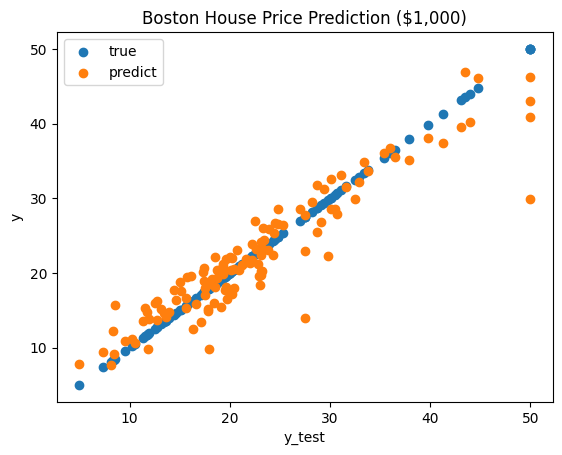

In [15]:
plt.scatter(y_test, y_test, label='true')
plt.scatter(y_test, y_pred, label='predict')
plt.xlabel('y_test')
plt.ylabel('y')
plt.legend()
plt.title('Boston House Price Prediction ($1,000)')

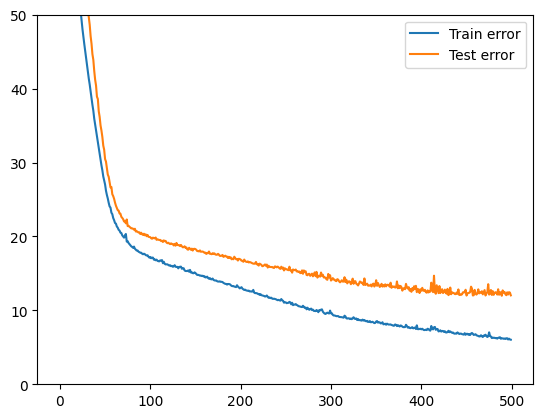

In [16]:
plt.plot(history.history['mse'], label='Train error')
plt.plot(history.history['val_mse'], label='Test error')
plt.ylim([0, 50])
plt.legend()

## sklearn LinearRegression 비교

In [17]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [18]:
regr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = regr.predict(X_test)

In [20]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [ -9.24921505   5.3740016   -0.18978519   2.47276025  -7.91169093
  19.17567768   0.39686369 -15.70607665   8.51605465  -8.27143794
  -8.66043461   4.90566322 -17.44435779]
Intercept: 
 25.01212400558077


In [21]:
# MSE(mean squared error) 계산
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# R2 계산 
print("R2 score: {:.2f}".format(r2_score(y_test, y_pred)))

Mean squared error: 24.43
R2 score: 0.76


Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

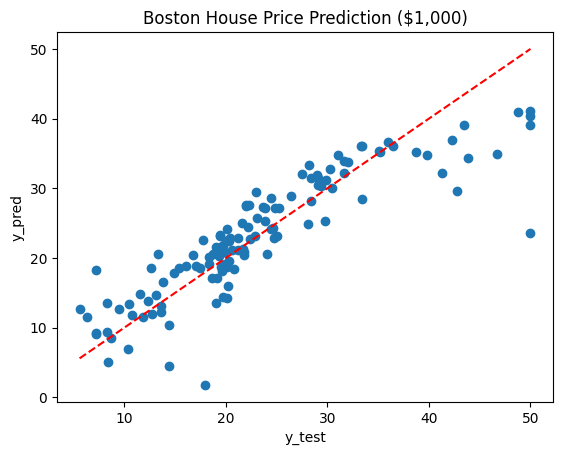

In [22]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Boston House Price Prediction ($1,000)')

## 실습

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 자동차 연비 예측 Regression model 작성

- auto-mpg.data - data file  


- auto-mpg.names - data 설명 file

    1. mpg:           continuous  
    2. cylinders:     multi-valued discrete  
    3. displacement:  continuous (배기량)   
    4. horsepower:    continuous  
    5. weight:        continuous  
    6. acceleration:  continuous  
    7. model year:    multi-valued discrete  
    8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
    9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data load 및 Preprocessing

In [24]:
data_path = tf.keras.utils.get_file("auto-mpg.data", 
        "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

rawdata.dropna(inplace=True)

data = rawdata.copy()

data = pd.get_dummies(data, columns=['cylinders', 'origin'])

label = data.pop('mpg')

X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Regression Model Build

### train

### predict

### $r^2$ 계산

### 시각화